In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("./test_dataset.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(56)
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(12)

,Name,random_seed,Anzahl Validierungsdaten =,oesch,selbstständige,keyboard_aug,remove_stopwords,remove_num_punc,lowercase,combi_model,...,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.percentage labelled @0.996:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.percentage labelled @0.997:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.percentage labelled @0.998:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.percentage labelled @0.999:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,Oesch8_nur_2.bestes,444,449,oesch8,nur,True,True,False,False,linear,...,0.97674,0.44098,0.97980,0.37416,0.97619,0.00000,0.00000,0.00000,0.00000,1.0
1,Oesch16_nur1,444,449,oesch16,nur,True,True,True,False,linear,...,0.94521,0.10022,0.97778,0.02450,1.00000,0.00000,0.00000,0.00000,0.00000,1.0
2,Oesch8_nur_2._bestes_4,2,449,oesch8,nur,True,True,False,False,linear,...,0.97196,0.43207,0.98454,0.35857,0.98758,0.00000,0.00000,0.00000,0.00000,1.0
3,Oesch8_nur_2.bestes3,1,449,oesch8,nur,True,True,False,False,linear,...,0.97222,0.44766,0.98010,0.35412,0.98113,0.00000,0.00000,0.00000,0.00000,1.0
4,Oesch8_nur1,444,449,oesch8,nur,True,False,True,False,linear,...,0.97297,0.45434,0.97549,0.37862,0.97059,0.00668,0.66667,0.00000,0.00000,1.0
5,Oesch8_nur_2.bestes2_nn,1,449,oesch8,nur,True,True,False,False,nn,...,0.95035,0.61024,0.95255,0.59911,0.95539,0.54566,0.95918,0.35189,0.97468,1.0
6,Oesch8_nur2,6,449,oesch8,nur,True,False,True,False,linear,...,0.97248,0.45657,0.97561,0.37416,0.97619,0.00223,0.00000,0.00000,0.00000,1.0
7,avid-vortex-54,444,449,oesch16,nur,False,False,True,True,nn,...,0.94810,0.63474,0.94737,0.55457,0.95582,0.47439,0.95305,0.28285,0.95276,1.0
8,Oesch8_nur3,4,449,oesch8,nur,True,False,True,False,linear,...,0.97664,0.44989,0.98020,0.34967,0.98726,0.00000,0.00000,0.00000,0.00000,1.0
9,serene-water-53,444,449,oesch16,nur,False,False,True,True,nn,...,0.94810,0.63474,0.94737,0.55457,0.95582,0.47439,0.95305,0.28285,0.95276,1.0


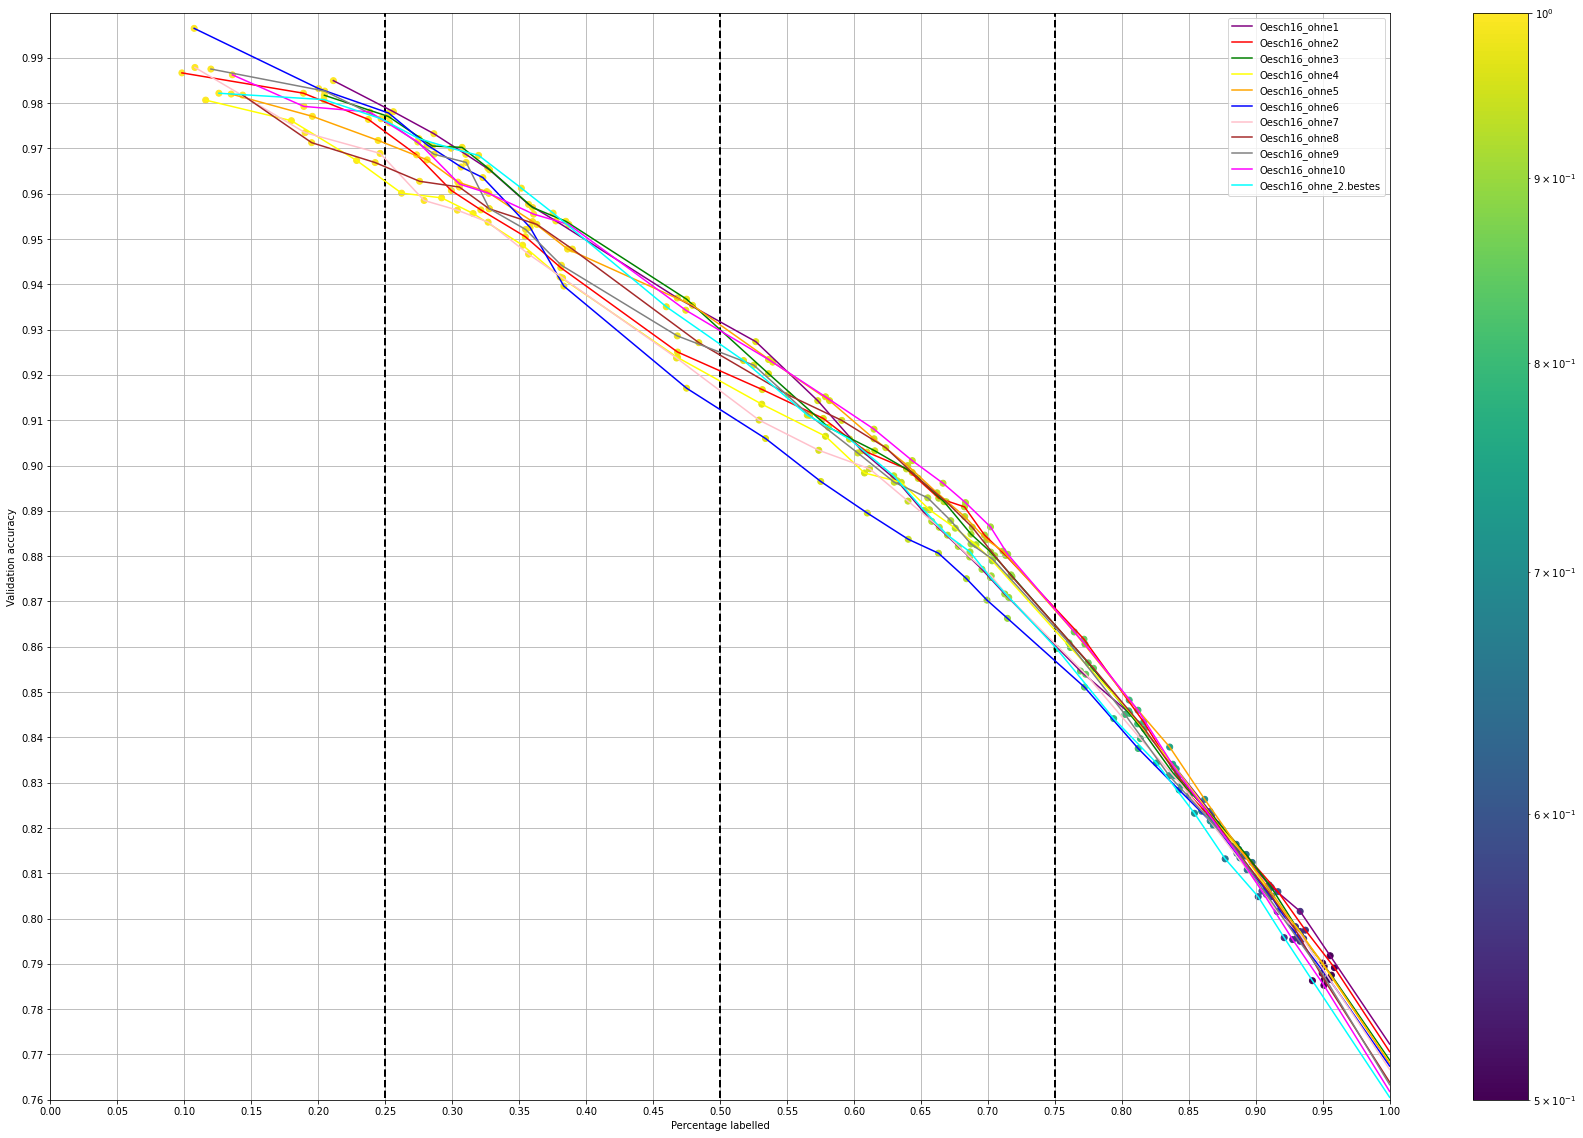

In [3]:
df = pd.read_csv("./test_dataset.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(56)

df = df[df.selbstständige == "ohne"]
df = df[df.oesch == "oesch16"]

#print(df)
names = df.Name.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"
         , "sandybrown", "gold", "black","thistle", "plum", "darkseagreen", "gainsboro", "darkred"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


#accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, linecolor in zip(percentages, accuracies, names, colors):
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = name)
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.76, 1.0))
plt.grid()
plt.yticks(np.arange(0.76, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

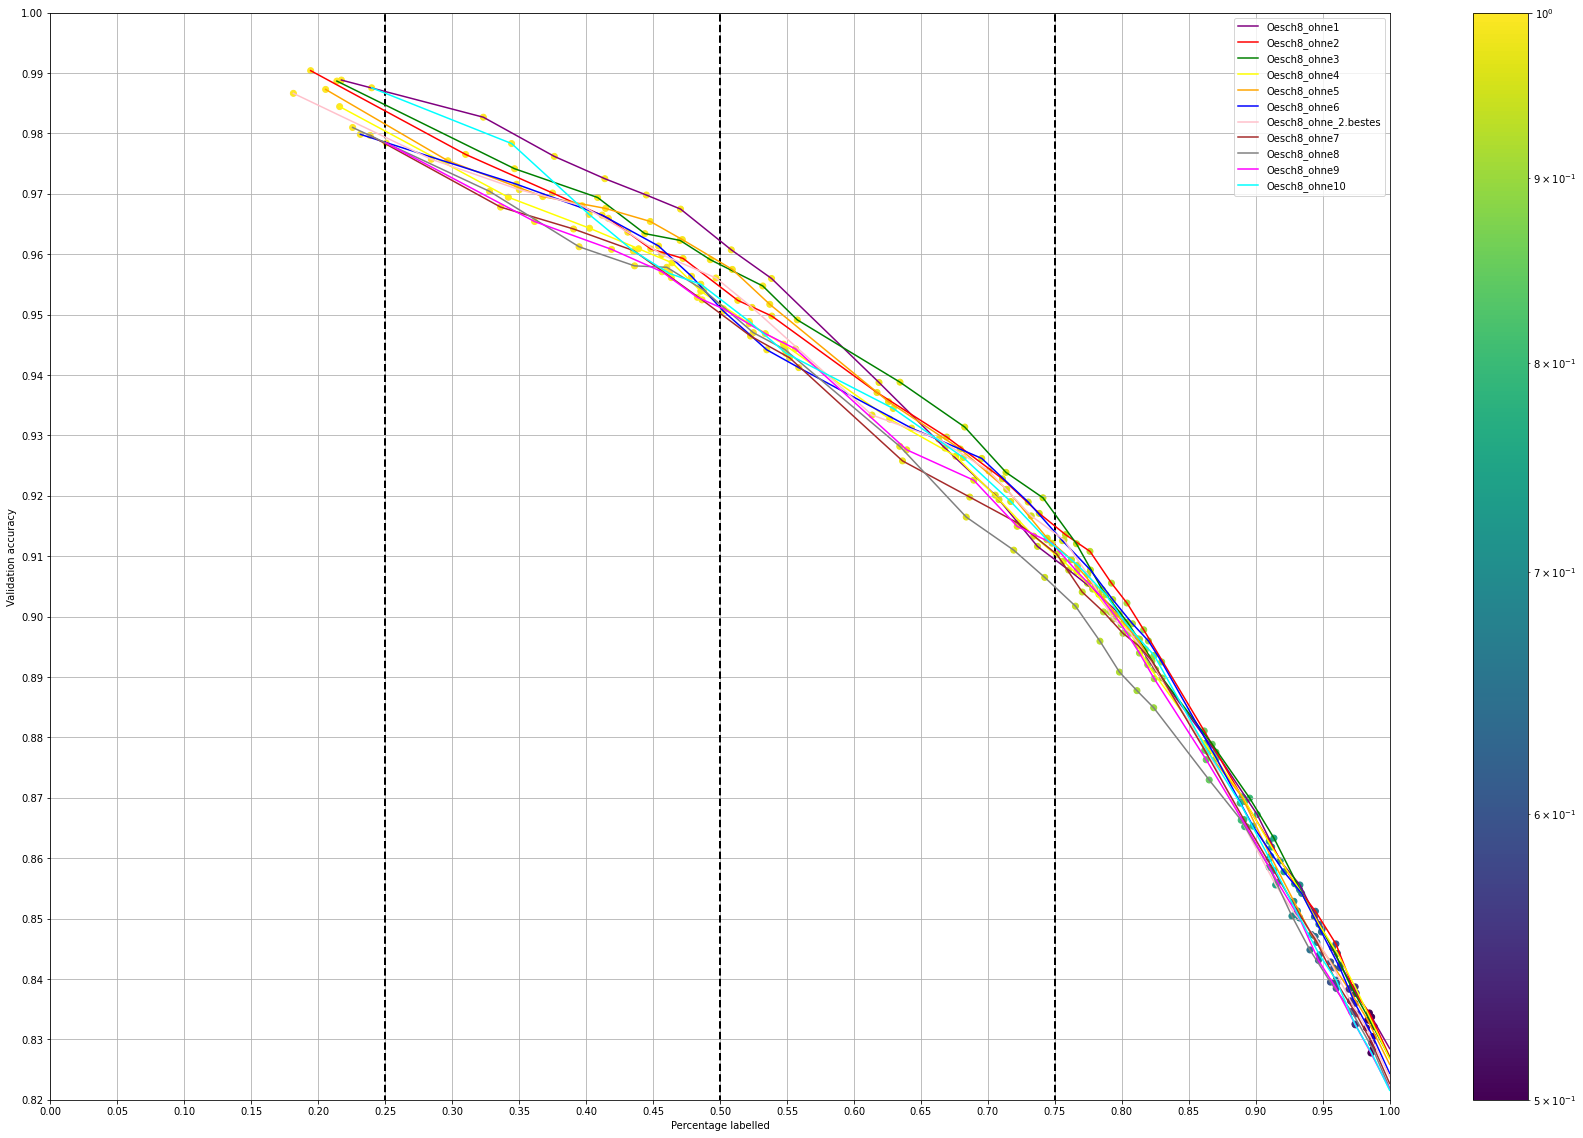

In [4]:
df = pd.read_csv("./test_dataset.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(56)

df = df[df.selbstständige == "ohne"]
df = df[df.oesch == "oesch8"]

#print(df)
names = df.Name.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"
         , "sandybrown", "gold", "black","thistle", "plum", "darkseagreen", "gainsboro", "darkred"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


#accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, linecolor in zip(percentages, accuracies, names, colors):
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = name)
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.82, 1.0))
plt.grid()
plt.yticks(np.arange(0.82, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

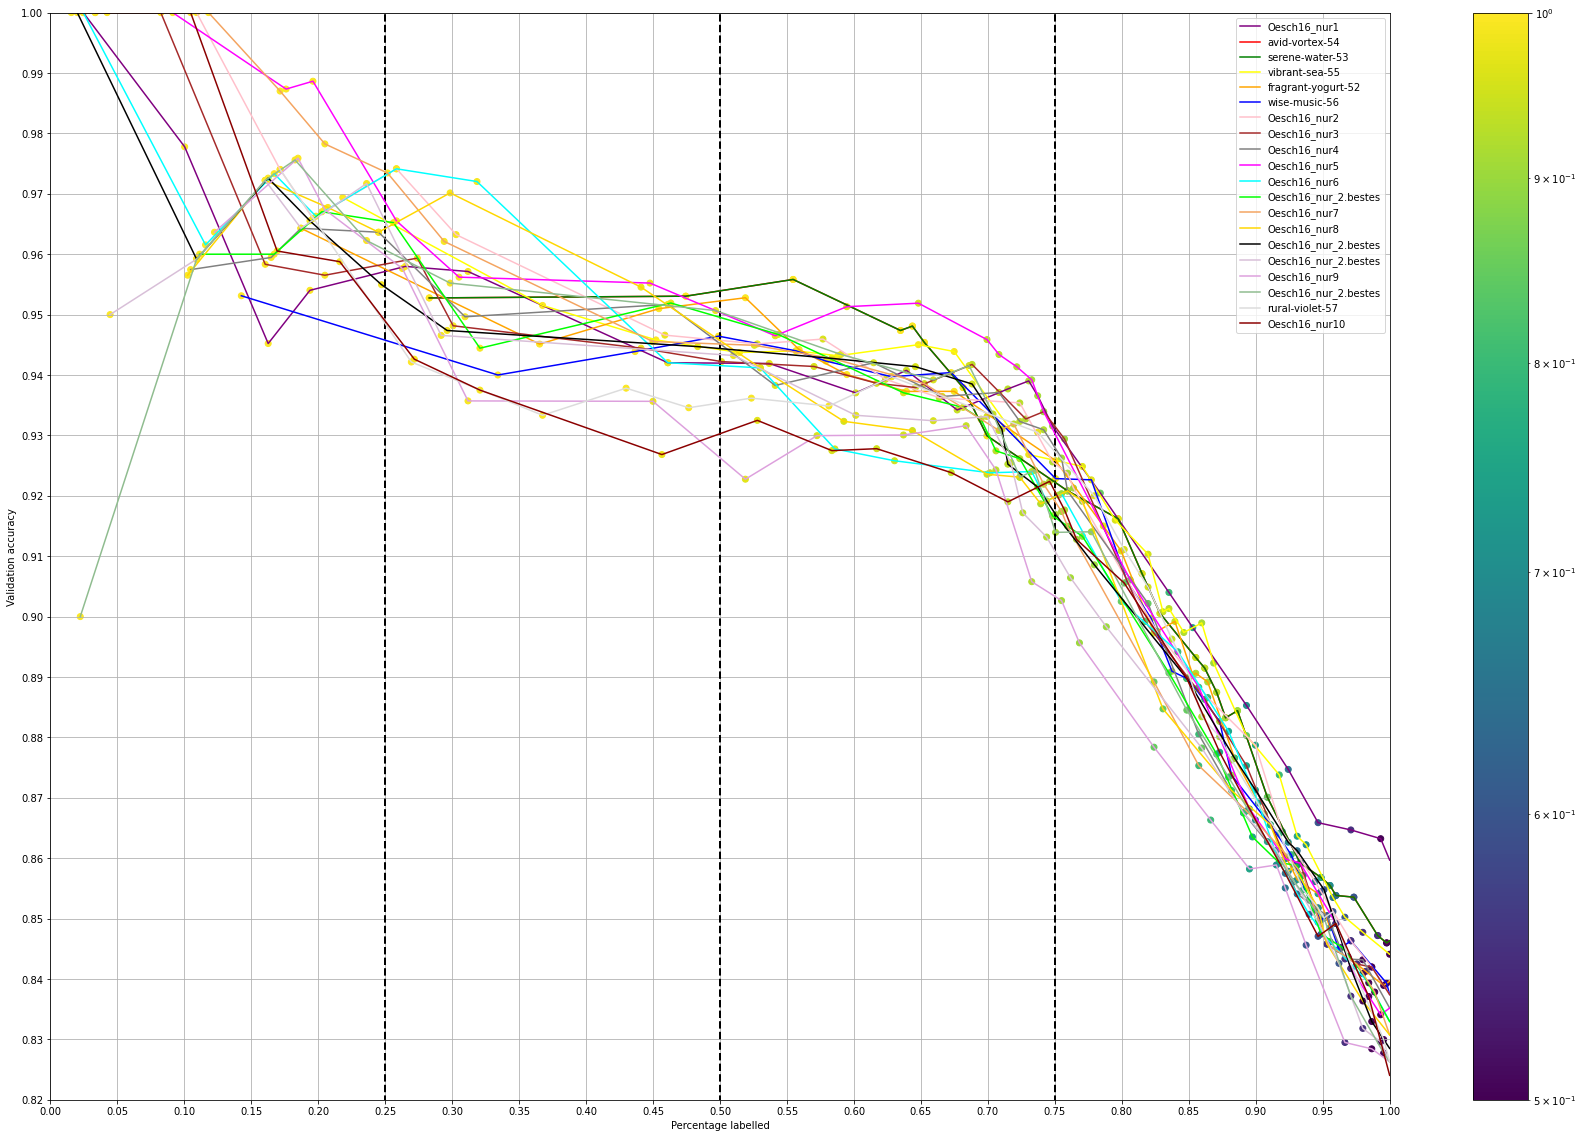

In [17]:
df = pd.read_csv("./test_dataset.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(56)

df = df[df.selbstständige == "nur"]
df = df[df.oesch == "oesch16"]
#df = df[df.combi_model != "nn"]
#df = df[df.remove_stopwords == True]

#print(df)
names = df.Name.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"
         , "sandybrown", "gold", "black","thistle", "plum", "darkseagreen", "gainsboro", "darkred"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


#accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.3):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, linecolor in zip(percentages, accuracies, names, colors):
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = name)
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.82, 1.0))
plt.grid()
plt.yticks(np.arange(0.82, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

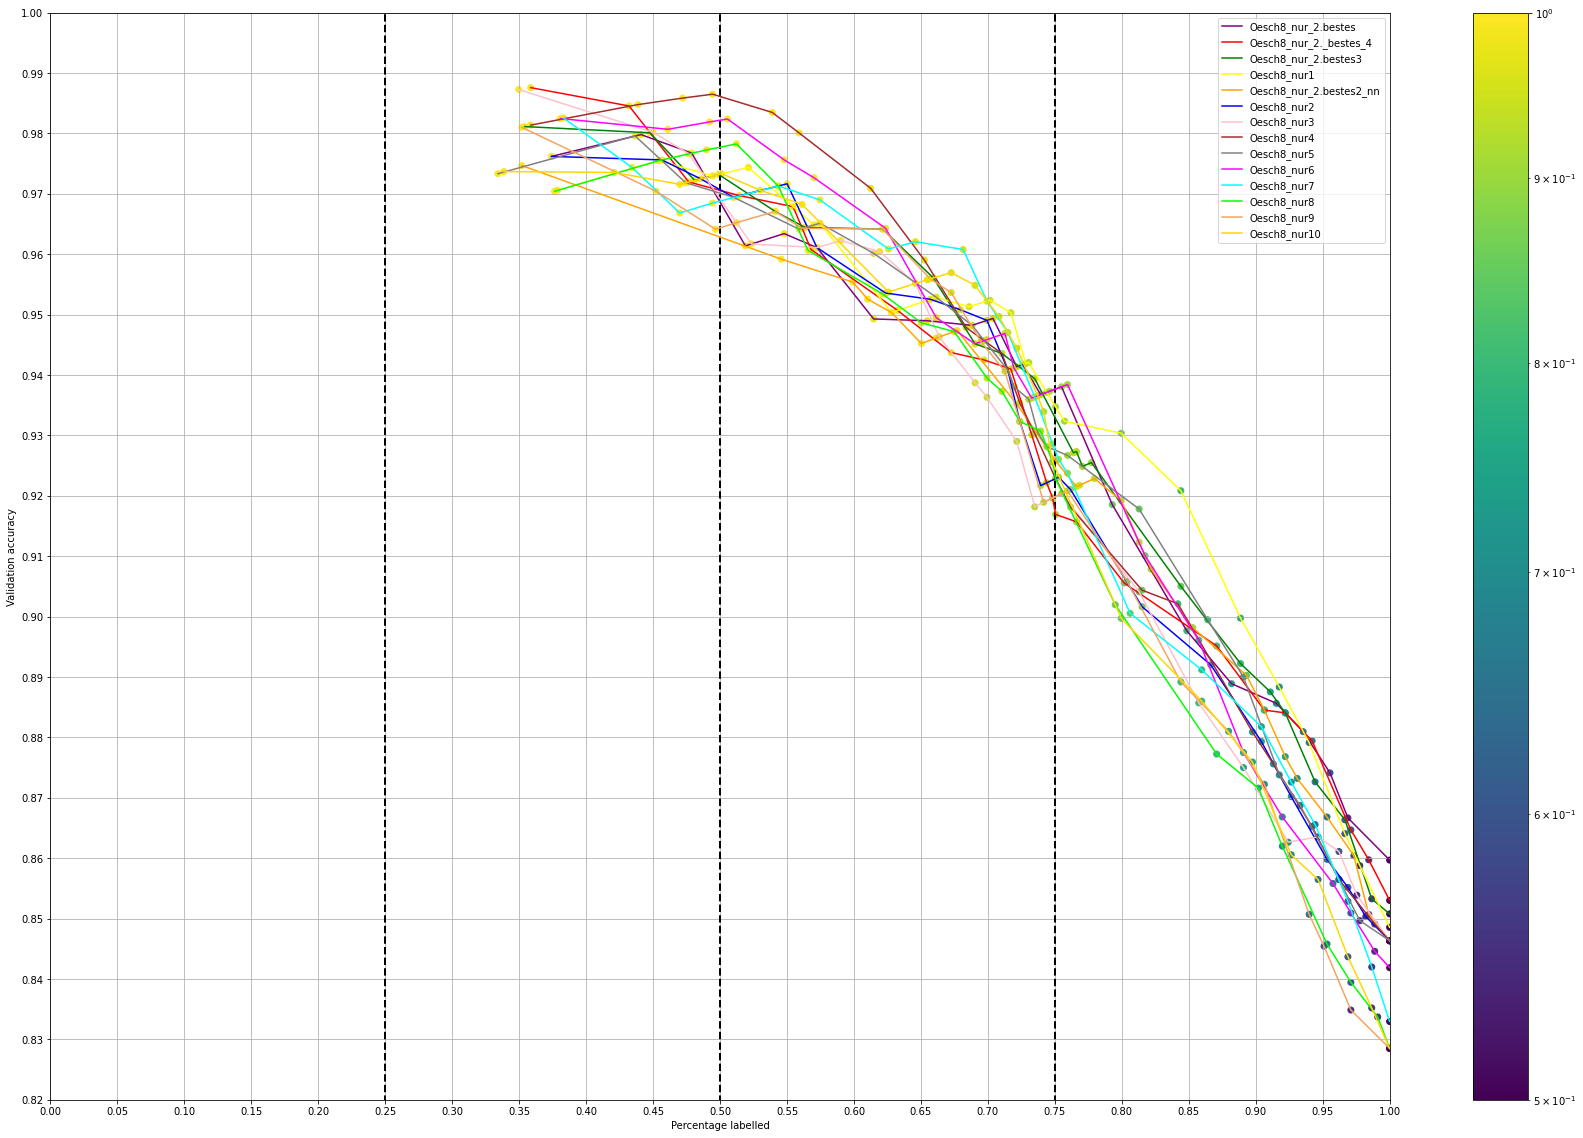

In [14]:
df = pd.read_csv("./test_dataset.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(56)

df = df[df.selbstständige == "nur"]
df = df[df.oesch == "oesch8"]
#df = df[df.combi_model == "nn"]
#df = df[df.remove_stopwords != True]

#print(df)
names = df.Name.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", 
          "magenta", "cyan", "lime", "sandybrown", "gold", "black","thistle", "plum", "darkseagreen", "gainsboro", "darkred"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


#accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.05):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, linecolor in zip(percentages, accuracies, names, colors):
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = name)
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.82, 1.0))
plt.grid()
plt.yticks(np.arange(0.82, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()